In [26]:
from tab_q_learning import TabularQLearning
from tab_q_learning_seq import SequentialTabularQLearning
from custom_spider_env.spider_fly_env.envs.grid_MA_testing import SpiderFlyEnvMA
from custom_spider_env.spider_fly_env.envs.pettingzoo_wrapper import PettingZooWrapper

import numpy as np

import pandas as pd

#### Normal Q-learning (Decentralized with Q-table per agent)

In [27]:
env = SpiderFlyEnvMA(render_mode = "ascii")
env = PettingZooWrapper(env)

env.observation_space[0].sample()

['X' ' ' 'O' 'O' 'X' ' ' ' ']


array([5, 3, 3, 5])

In [28]:
env = SpiderFlyEnvMA(max_steps = 200)
env = PettingZooWrapper(env)

In [29]:
tabqlearning = TabularQLearning(env)

In [30]:
rewards = tabqlearning.train(50000)

Episode: 0 - Reward:[0 4]


Episode: 2500 - Reward:[106  96]
Episode: 5000 - Reward:[113  95]
Episode: 7500 - Reward:[113 108]
Episode: 10000 - Reward:[116 110]
Episode: 12500 - Reward:[119 103]
Episode: 15000 - Reward:[132 100]
Episode: 17500 - Reward:[123 103]
Episode: 20000 - Reward:[118 102]
Episode: 22500 - Reward:[116 102]
Episode: 25000 - Reward:[121 101]
Episode: 27500 - Reward:[115  97]
Episode: 30000 - Reward:[106 101]
Episode: 32500 - Reward:[114 101]
Episode: 35000 - Reward:[114  97]
Episode: 37500 - Reward:[120  89]
Episode: 40000 - Reward:[116 103]
Episode: 42500 - Reward:[118 100]
Episode: 45000 - Reward:[117 106]
Episode: 47500 - Reward:[114 102]


In [31]:
data = np.vstack(rewards)

df = pd.DataFrame(data, columns = ["agent_" + str(idx) for idx in range(tabqlearning.nr_agents)])
df["Episode"] = list(range(data.shape[0]))

df = df.melt('Episode', var_name='Agent', value_name='Rewards')

In [32]:
# we need 1.5.0 for rolling average of next step
pd.__version__

'1.5.0'

In [33]:
df["Avg_Reward"] = df["Rewards"].rolling(window = 50, step = 50).mean()
df = df[df.Episode > 50]
df.dropna()

,Episode,Agent,Rewards,Avg_Reward
100,100,agent_0,4,19.02
150,150,agent_0,72,58.02
200,200,agent_0,50,69.06
250,250,agent_0,74,75.02
300,300,agent_0,75,75.66
...,...,...,...,...
99750,49750,agent_1,93,100.70
99800,49800,agent_1,102,100.66
99850,49850,agent_1,116,102.20
99900,49900,agent_1,84,103.26


<Axes: xlabel='Episode', ylabel='Avg_Reward'>

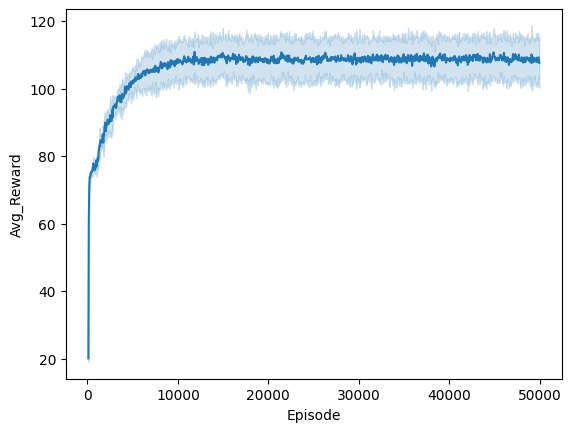

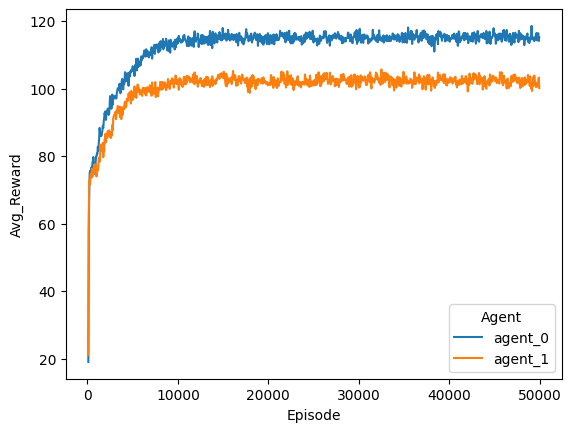

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = df, x = "Episode", y = "Avg_Reward")
plt.figure()
sns.lineplot(data = df, x = "Episode", y = "Avg_Reward", hue = "Agent")

In [35]:
env = SpiderFlyEnvMA(render_mode = "ascii")
env = PettingZooWrapper(env)

[' ' 'X' 'X' 'O' 'O' ' ' ' ']


In [11]:
obs, _ = env.reset()
terminals = [False]
truncations = [False]

while not (any(terminals) or all(truncations)):
    # get actions
    actions = []
    for agent_idx in range(tabqlearning.nr_agents):
        actions.append(tabqlearning.get_action(obs[agent_idx], agent_idx, deterministic = True))
    # take action
    next_obs, rewards, terminals, truncations, _ = env.step(actions) 

    # update state
    obs = next_obs

[' ' 'O' 'X' ' ' 'O' ' ' 'X']
[' ' 'X' ' ' 'O' 'O' 'X' ' ']
[' ' 'O' 'X' 'O' 'X' ' ' ' ']
[' ' 'O' ' ' 'X' 'X' ' ' 'O']
[' ' 'O' 'X' ' ' ' ' 'X' 'O']
[' ' 'X' 'O' 'O' ' ' ' ' 'X']
[' ' 'O' 'X' 'O' ' ' 'X' ' ']
[' ' 'O' ' ' 'X' 'X' ' ' 'O']
[' ' 'O' 'X' ' ' ' ' 'X' 'O']
[' ' 'X' ' ' 'O' ' ' 'O' 'X']
[' ' ' ' 'X' 'O' ' ' 'X' 'O']
[' ' 'O' ' ' 'X' ' ' 'O' 'X']
[' ' 'O' 'X' ' ' ' ' 'X' 'O']
[' ' 'X' ' ' 'O' ' ' 'O' 'X']
['O' ' ' 'X' 'O' ' ' 'X' ' ']
['O' 'O' ' ' 'X' 'X' ' ' ' ']
['O' 'O' 'X' 'X' ' ' ' ' ' ']
['O' 'X' ' ' ' ' 'X' 'O' ' ']
['X' 'O' ' ' ' ' ' ' 'X' 'O']
['O' 'X' ' ' 'O' ' ' ' ' 'X']
['X' 'O' ' ' 'O' ' ' 'X' ' ']
[' ' 'X' ' ' 'O' 'X' 'O' ' ']
['O' 'X' ' ' 'X' ' ' 'O' ' ']
['X' ' ' 'O' ' ' 'X' 'O' ' ']
[' ' 'X' 'O' ' ' ' ' 'X' 'O']
['O' ' ' 'X' 'O' ' ' ' ' 'X']
['O' ' ' ' ' 'X' ' ' 'O' 'X']
['O' ' ' 'X' ' ' ' ' 'X' 'O']
['O' 'X' 'O' ' ' ' ' ' ' 'X']
['O' 'O' 'X' ' ' ' ' 'X' ' ']
['O' 'X' ' ' 'O' 'X' ' ' ' ']
['X' 'O' 'O' 'X' ' ' ' ' ' ']
[' ' 'X' 'X' ' ' 'O' 'O' ' ']
[' ' 'X' '

#### Sequential Q-learning

Tabular Q-learning:
$$
\begin{align*}
    & s = env.reset()\\
    &\text{while not } done:\\
    & \quad\quad \text{for } i \text{ in } (1, \ldots, m):\\
    & \quad\quad\quad\quad a_i = \argmax_{a_i} Q_i(s_i, a_i)\\
    & \quad\quad s', r, d = env.step(a_1, \ldots, a_m)\\
    & \quad\quad \text{for } i \text{ in } (1, \ldots, m):\\
    & \quad\quad\quad\quad Q_i(s_i, a_i) = Q_i(s_i, a_i) + lr * ((r + \gamma * \max_{a'_i} Q_i(s'_i, a'_i)) - Q_i(s_i, a_i))\\
\end{align*}
$$


Sequential Tabular Q-learning:
$$
\begin{align*}
    & s = env.reset()\\
    &\text{while not } done:\\
    & \quad\quad \text{for } i \text{ in } (1, \ldots, m):\\
    & \quad\quad\quad\quad a_i = \argmax_{a_i} Q_i(s_i, a_1, \ldots, a_i)\\
    & \quad\quad s', r, d = env.step(a_1, \ldots, a_m)\\
    & \quad\quad \text{for } i \text{ in } (1, \ldots, m-1):\\
    & \quad\quad\quad\quad Q_i(s_i, a_1, \ldots, a_i) = Q_i(s_i, a_1, \ldots, a_i) + lr * ((r + \gamma * \max_{a_{i+1}} Q_{i+1}(s_{i+1}, a_1, \ldots, a_{i+1})) - Q_i(s_i, a_1, \ldots, a_i))\\
    & \quad\quad Q_m(s_m, a_1, \ldots, a_m) = Q_m(s_i, a_1, \ldots, a_m) + lr * ((r + \gamma * \max_{a'_1} Q_1(s'_1, a'_1)) - Q_m(s_m, a_1, \ldots, a_m))\\
\end{align*}
$$


In [18]:
from tab_q_learning import TabularQLearning
from tab_q_learning_seq import SequentialTabularQLearning
from custom_spider_env.spider_fly_env.envs.grid_MA_testing import SpiderFlyEnvMA
from custom_spider_env.spider_fly_env.envs.pettingzoo_wrapper import PettingZooWrapper

import numpy as np

import pandas as pd

In [19]:
env = SpiderFlyEnvMA(max_steps = 200)
env = PettingZooWrapper(env)

In [20]:
seqTabqlearning = SequentialTabularQLearning(env)

In [21]:
rewards = seqTabqlearning.train(100000)

Episode: 0 - Reward:[2 0]


Episode: 5000 - Reward:[94 94]
Episode: 10000 - Reward:[102  92]
Episode: 15000 - Reward:[128 102]
Episode: 20000 - Reward:[119  97]
Episode: 25000 - Reward:[107  94]
Episode: 30000 - Reward:[105 103]
Episode: 35000 - Reward:[112 108]
Episode: 40000 - Reward:[122 101]
Episode: 45000 - Reward:[124 106]
Episode: 50000 - Reward:[123 126]
Episode: 55000 - Reward:[105 109]
Episode: 60000 - Reward:[122 110]
Episode: 65000 - Reward:[109 110]
Episode: 70000 - Reward:[108 112]
Episode: 75000 - Reward:[112 115]
Episode: 80000 - Reward:[124 106]
Episode: 85000 - Reward:[117 118]
Episode: 90000 - Reward:[119 111]
Episode: 95000 - Reward:[110 113]


In [22]:
data = np.vstack(rewards)

df = pd.DataFrame(data, columns = ["agent_" + str(idx) for idx in range(seqTabqlearning.nr_agents)])
df["Episode"] = list(range(data.shape[0]))

df = df.melt('Episode', var_name='Agent', value_name='Rewards')

df["Avg_Reward"] = df["Rewards"].rolling(window = 50, step = 50).mean()
df = df[df.Episode > 50]
df.dropna()

,Episode,Agent,Rewards,Avg_Reward
100,100,agent_0,6,9.40
150,150,agent_0,29,32.48
200,200,agent_0,61,56.22
250,250,agent_0,53,66.48
300,300,agent_0,70,67.22
...,...,...,...,...
199750,99750,agent_1,108,112.58
199800,99800,agent_1,111,113.42
199850,99850,agent_1,110,113.48
199900,99900,agent_1,105,113.12


<Axes: xlabel='Episode', ylabel='Avg_Reward'>

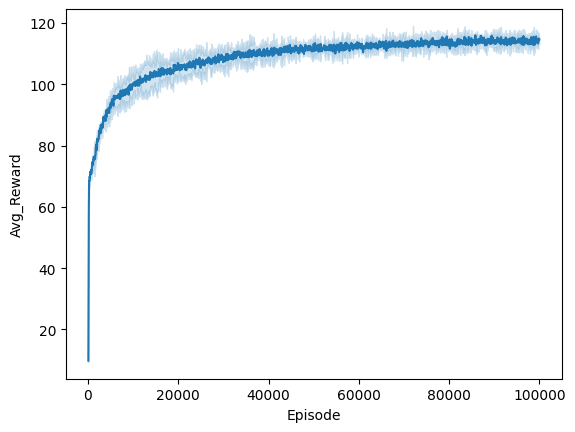

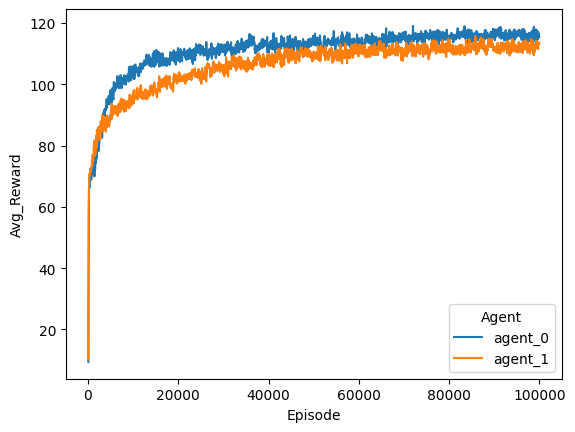

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = df, x = "Episode", y = "Avg_Reward")
plt.figure()
sns.lineplot(data = df, x = "Episode", y = "Avg_Reward", hue = "Agent")